# Logistic Regression on the Mushroom Dataset

Have you every gone for a walk in the woods and been tempted to bring back some mushrooms for your dinner salad? Well, you may then wonder how many edible or poisonous mushrooms you might need to be shown before you could confidently forage in the forest on your own. We'll first load a database of mushrooms that have been hand-classified according to whether or not they are poisonous. Then, we'll put it into a form suitable for logistic regression by converting all of the categorical variables to "dummy" variables using a "1-hot" representation. Then we'll fit logistic regression models on training sets of increasing size.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/demos/classification/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
encoded_data = pd.get_dummies(data, drop_first=True)
encoded_data.head()
mapping = dict(zip(range(len(le.classes_)), le.classes_))

The transformation is mapping each categorical variable to a series of 1-hot or "dummy" variables,
so the weights are meaningful in a logistic regression model. Next, we convert this DataFrame to numpy arrays, suitable for input to sklearn.

In [4]:
y = encoded_data['class'].values
X = encoded_data.drop('class', axis=1).values

Let's look at some of the characteristics of the data.

In [5]:
num_data_points = X.shape[0] 
num_original_predictors = data.shape[1]-1
num_expanded_predictors = X.shape[1]
poisonous = np.mean(y)*100

print("Number of data points: %d" % num_data_points)
print("Number of original predictors: %d" % num_original_predictors)
print("Number of expanded predictors: %d" % num_expanded_predictors)
print("Percent poisonous: %.1f%%" % poisonous)

Number of data points: 8124
Number of original predictors: 22
Number of expanded predictors: 95
Percent poisonous: 48.2%


### Fitting logistic regression models

We construct a series of logistic regression models with an increasing number of training points. Specifically, we will:

* let the sample size $n$ vary from 0.1% to 10% of the available data in increments of 0.1%
* for each $n$, train a logistic regression model on $n$ randomly selected training points, and test on the remaining data
* for each $n$, do this 10 times and average the error rates
* plot the resulting average error rates as a function of $n$

100%|█████████████████████████████████████████| 109/109 [00:08<00:00, 12.33it/s]


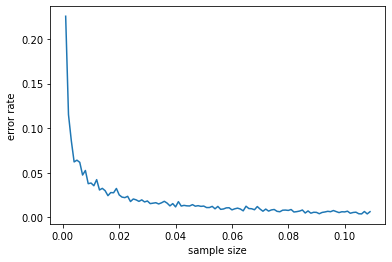

In [6]:
trials = 10
sample_size = np.arange(0.001, 0.11, 0.001)
error_rate = np.zeros(len(sample_size))

from tqdm import tqdm
error_rate = []
lr = LogisticRegression(solver='lbfgs')
for n in tqdm(sample_size):
    err = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n)
        lr.fit(X_train, y_train)
        this_err = np.mean(lr.predict(X_test) != y_test)
        err.append(this_err)
    error_rate.append(np.mean(err))

plt.plot(sample_size, error_rate)
plt.xlabel('sample size')
plt.ylabel('error rate')
plt.show()

In [7]:
e = np.array(error_rate)

n_05 = np.min(sample_size[np.where(e < 0.05)]*num_data_points)
print("%d samples are required before the error falls below 5%%" % n_05)

n_01 = np.min(sample_size[np.where(e < 0.01)]*num_data_points)
print("%d samples are required before the error falls below 1%%" % n_01)

56 samples are required before the error falls below 5%
438 samples are required before the error falls below 1%


### Classification Metrics

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(n_01))
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

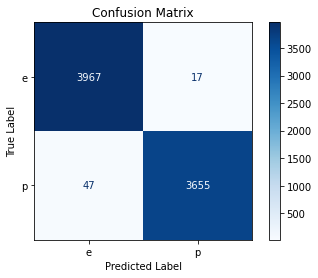

In [10]:
y_test_cl = [mapping[i] for i in y_test]
y_pred_cl = [mapping[i] for i in y_pred]

matrix = ConfusionMatrixDisplay.from_predictions(y_test_cl, y_pred_cl, 
                                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params()
plt.gcf().axes[1].tick_params()
plt.show()

### ROC curve

In [11]:
from sklearn.metrics import RocCurveDisplay

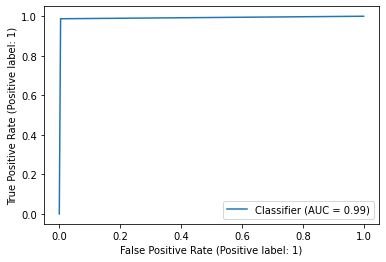

In [12]:
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()